# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [1]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [2]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

# Load libraries

In [18]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
# download necessary NLTK data

#import nltk
#nltk.download(['punkt', 'wordnet', 'stopwords'])
#from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer

import spacy

import re
import numpy as np 

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import PrecisionRecallDisplay

import pickle 

nlp = spacy.load('en_core_web_sm')


## Data Exploration

In [5]:
data.head() 

,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


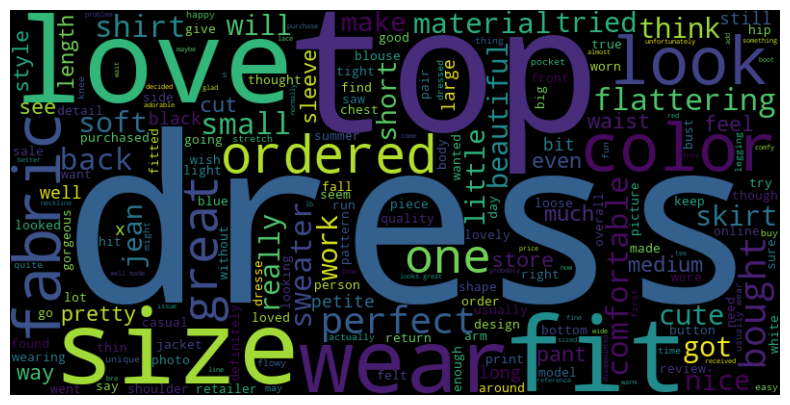

In [125]:
text = ' '.join(df['Review Text'])

wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Looking at this wordcloud, we see that some nouns like 'dress' and 'top' are very common (and other nouns like 'sweater' also have a notable frequency)
Given that we're trying to predict if they will recommend the outfit, not if they're talking about a dress vs blouse, we will likely remove some of these nouns to reduce noise.

In [6]:
# check for blanks
df.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Recommended IND            0
dtype: int64

no blanks/nulls in the dataset

In [7]:
column_iteration = 'Department Name' 
df[column_iteration].unique()

array(['Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', 'Intimate'],
      dtype=object)

In [8]:
# profile each column
for column_iteration in df.columns:
    print(column_iteration)
    print( df[column_iteration].value_counts() )
    print('__max__')
    print(  df[column_iteration].max()  )
    print('__min__')
    print(  df[column_iteration].min()  )
    print('')
    print('')
    print('')

Clothing ID
Clothing ID
1078    871
862     658
1094    651
1081    487
829     452
       ... 
596       1
2         1
587       1
962       1
957       1
Name: count, Length: 531, dtype: int64
__max__
1205
__min__
2



Age
Age
39    1043
35     668
38     618
36     616
34     615
      ... 
92       1
93       1
94       1
87       1
86       1
Name: count, Length: 77, dtype: int64
__max__
99
__min__
18



Title
Title
Love it!                               129
Beautiful                               88
Love                                    81
Love!                                   79
Beautiful!                              71
                                      ... 
Classic and sophisticated                1
Full skirt                               1
Not exactly what i expected              1
Flattering and lovely sweater dress      1
Perfect except slip                      1
Name: count, Length: 13142, dtype: int64
__max__
~~so very retailer~~
__min__
"beach business"



Revi

### Thoughts  

Age: An age of 99 is VERY suspicious, but it is technically possible, so without better evidence, i'll include it

Title: I find it interesting that there's so many duplicate titles, but "Love it!" does make sense for something multiple people would think of

Positive Feedback Count: While the profile isn't worrisome, the definition does give me pause. It's a value collected after the tiem when a review would be marked "recommend' or not. So given that temporal issue, I will likely drop it.
Clothing ID: Similarly, clothing ID is an ID number, not a continuous number, and as an Identifier, should also be dropped.  
While item 1078 might be cooler than 2, maybe we shouldn't just assume that everyone will recommend it.

## Building Pipeline

In [6]:
numeric_features = (
    X
    .select_dtypes(exclude=['object']).columns
    .drop(
        [
            'Clothing ID', 
            'Positive Feedback Count',
        ],
    )
)
print('Numerical features:', numeric_features)

categorical_features = (
    X[[
        'Division Name',
        'Department Name',
        'Class Name',
    ]].columns
)
print('Categorical features:', categorical_features)


text_features = (
    X[[
        'Title',
        'Review Text',
    ]].columns
)
print ('Review Text features:', text_features)

drop_features = (
    X[[
        'Clothing ID',
        'Positive Feedback Count',
    ]].columns
)
print ('Review Drop features:', drop_features)

Numerical features: Index(['Age'], dtype='object')
Categorical features: Index(['Division Name', 'Department Name', 'Class Name'], dtype='object')
Review Text features: Index(['Title', 'Review Text'], dtype='object')
Review Drop features: Index(['Clothing ID', 'Positive Feedback Count'], dtype='object')


In [7]:


numeric_pipeline = Pipeline([
    (
        'imputer',
        SimpleImputer(strategy='mean'),
    ),
    (
        'scaler',
        MinMaxScaler(),
    ),
])

numeric_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler())])

In [8]:


categorical_pipeline = Pipeline([
    (
        'ordinal_encoder',
        OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=-1,
        )
    ),    
    (
        'imputer',
        SimpleImputer(
            strategy='most_frequent',
        )
    ),
    (
        'categorical_encoder',
        OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore',
        )
    ),
])

categorical_pipeline

Pipeline(steps=[('ordinal_encoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('categorical_encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [9]:
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop
    
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X):
        return X.drop(columns = self.columns_to_drop)



class SpacyLemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lemmatized = [ ' '.join( token.lemma_ for token in doc if not token.is_stop )  for doc in self.nlp.pipe(X) ]
        lemmatized = [' '.join( word for word in token.split() if word not in ['top', 'dress', 'bottom', 'jacket', 'intimate', 'trend'] ) for token in lemmatized ]
        return lemmatized 
    


In [10]:
tfidf_pipeline = Pipeline([
    (
        'dimension_reshaper',
        FunctionTransformer(
            np.reshape,
            kw_args={'newshape':-1},
        ),
    ),
    (
        'lemmatizer',
        SpacyLemmatizer(nlp=nlp),
    ),
    (
        'tfidf_vectorizer',
        TfidfVectorizer(
            stop_words='english',
        ),
    ),
])
tfidf_pipeline 

Pipeline(steps=[('dimension_reshaper',
                 FunctionTransformer(func=<function reshape at 0x0000022F38040370>,
                                     kw_args={'newshape': -1})),
                ('lemmatizer',
                 SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x0000022F59CC6540>)),
                ('tfidf_vectorizer', TfidfVectorizer(stop_words='english'))])

In [11]:


feature_engineering = ColumnTransformer([
        ('drop', 'drop', ['Clothing ID', 'Positive Feedback Count']),
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features),
        ('tfidf_tite_text', tfidf_pipeline, ['Title']),
        ('tfidf_review_text', tfidf_pipeline, ['Review Text']),
])


feature_engineering

ColumnTransformer(transformers=[('drop', 'drop',
                                 ['Clothing ID', 'Positive Feedback Count']),
                                ('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 Index(['Age'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_fr...
                                                  TfidfVectorizer(stop_words='english'))]),
                                 ['Title']),
                                ('tfidf_review_text',
                                 Pipeline(steps=[('dimension_reshaper',
                                                  FunctionTransformer(func=<function reshape at 0x0000022F38040370>,
                                                                      kw_args={'newshape': -1})),
                                                 ('lemmatizer',
                                                  SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x0000022F59CC6540>)),
                                                 ('tfidf_vectorizer',
                                                  TfidfVectorizer(stop_words='english'))]),
                                 ['Review Text'])])

## Training Pipeline

In [12]:


model_pipeline = make_pipeline(
    feature_engineering,
    RandomForestClassifier(random_state=27),
)

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('drop', 'drop',
                                                  ['Clothing ID',
                                                   'Positive Feedback Count']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('imp...
                                                  Pipeline(steps=[('dimension_reshaper',
                                                                   FunctionTransformer(func=<function reshape at 0x0000022F38040370>,
                                                                                       kw_args={'newshape': -1})),
                                                                  ('lemmatizer',
                                                                   SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x0000022F59CC6540>)),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  ['Review Text'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=27))])

In [13]:


y_pred_forest_pipeline = model_pipeline.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)

print('Accuracy:', accuracy_forest_pipeline)

Accuracy: 0.8634146341463415


## Fine-Tuning Pipeline

In [14]:
model_pipeline.get_params().keys()


"""
dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'columntransformer', 
           'randomforestclassifier', 'columntransformer__force_int_remainder_cols', 
           'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 
           'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 
           'columntransformer__verbose_feature_names_out', 'columntransformer__drop', 'columntransformer__num', 
           'columntransformer__cat', 'columntransformer__tfidf_tite_text', 'columntransformer__tfidf_review_text', 
           'columntransformer__num__memory', 'columntransformer__num__steps', 'columntransformer__num__transform_input', 
           'columntransformer__num__verbose', 'columntransformer__num__imputer', 'columntransformer__num__scaler', 
           'columntransformer__num__imputer__add_indicator', 'columntransformer__num__imputer__copy', 
           'columntransformer__num__imputer__fill_value', 'columntransformer__num__imputer__keep_empty_features', 
           'columntransformer__num__imputer__missing_values', 'columntransformer__num__imputer__strategy', 
           'columntransformer__num__scaler__clip', 'columntransformer__num__scaler__copy', 
           'columntransformer__num__scaler__feature_range', 'columntransformer__cat__memory', 'columntransformer__cat__steps', 
           'columntransformer__cat__transform_input', 'columntransformer__cat__verbose', 'columntransformer__cat__ordinal_encoder', 
           'columntransformer__cat__imputer', 'columntransformer__cat__categorical_encoder', 
           'columntransformer__cat__ordinal_encoder__categories', 'columntransformer__cat__ordinal_encoder__dtype', 
           'columntransformer__cat__ordinal_encoder__encoded_missing_value', 
           'columntransformer__cat__ordinal_encoder__handle_unknown', 'columntransformer__cat__ordinal_encoder__max_categories', 
           'columntransformer__cat__ordinal_encoder__min_frequency', 'columntransformer__cat__ordinal_encoder__unknown_value', 
           'columntransformer__cat__imputer__add_indicator', 'columntransformer__cat__imputer__copy', 
           'columntransformer__cat__imputer__fill_value', 'columntransformer__cat__imputer__keep_empty_features', 
           'columntransformer__cat__imputer__missing_values', 'columntransformer__cat__imputer__strategy', 
           'columntransformer__cat__categorical_encoder__categories', 'columntransformer__cat__categorical_encoder__drop', 
           'columntransformer__cat__categorical_encoder__dtype', 'columntransformer__cat__categorical_encoder__feature_name_combiner', 
           'columntransformer__cat__categorical_encoder__handle_unknown', 'columntransformer__cat__categorical_encoder__max_categories', 
           'columntransformer__cat__categorical_encoder__min_frequency', 'columntransformer__cat__categorical_encoder__sparse_output', 
           'columntransformer__tfidf_tite_text__memory', 'columntransformer__tfidf_tite_text__steps', 
           'columntransformer__tfidf_tite_text__transform_input', 'columntransformer__tfidf_tite_text__verbose', 
           'columntransformer__tfidf_tite_text__dimension_reshaper', 'columntransformer__tfidf_tite_text__lemmatizer', 
           'columntransformer__tfidf_tite_text__tfidf_vectorizer', 'columntransformer__tfidf_tite_text__dimension_reshaper__accept_sparse', 
           'columntransformer__tfidf_tite_text__dimension_reshaper__check_inverse', 
           'columntransformer__tfidf_tite_text__dimension_reshaper__feature_names_out', 
           'columntransformer__tfidf_tite_text__dimension_reshaper__func', 'columntransformer__tfidf_tite_text__dimension_reshaper__inv_kw_args', 
           'columntransformer__tfidf_tite_text__dimension_reshaper__inverse_func', 
           'columntransformer__tfidf_tite_text__dimension_reshaper__kw_args', 'columntransformer__tfidf_tite_text__dimension_reshaper__validate', 
           'columntransformer__tfidf_tite_text__lemmatizer__nlp', 'columntransformer__tfidf_tite_text__tfidf_vectorizer__analyzer', 
           'columntransformer__tfidf_tite_text__tfidf_vectorizer__binary', 'columntransformer__tfidf_tite_text__tfidf_vectorizer__decode_error', 
           'columntransformer__tfidf_tite_text__tfidf_vectorizer__dtype', 'columntransformer__tfidf_tite_text__tfidf_vectorizer__encoding', 
           'columntransformer__tfidf_tite_text__tfidf_vectorizer__input', 'columntransformer__tfidf_tite_text__tfidf_vectorizer__lowercase', 
           'columntransformer__tfidf_tite_text__tfidf_vectorizer__max_df', 'columntransformer__tfidf_tite_text__tfidf_vectorizer__max_features', 
           'columntransformer__tfidf_tite_text__tfidf_vectorizer__min_df', 'columntransformer__tfidf_tite_text__tfidf_vectorizer__ngram_range', 
           'columntransformer__tfidf_tite_text__tfidf_vectorizer__norm', 'columntransformer__tfidf_tite_text__tfidf_vectorizer__preprocessor', 
           'columntransformer__tfidf_tite_text__tfidf_vectorizer__smooth_idf', 'columntransformer__tfidf_tite_text__tfidf_vectorizer__stop_words', 
           'columntransformer__tfidf_tite_text__tfidf_vectorizer__strip_accents', 'columntransformer__tfidf_tite_text__tfidf_vectorizer__sublinear_tf', 
           'columntransformer__tfidf_tite_text__tfidf_vectorizer__token_pattern', 'columntransformer__tfidf_tite_text__tfidf_vectorizer__tokenizer', 
           'columntransformer__tfidf_tite_text__tfidf_vectorizer__use_idf', 'columntransformer__tfidf_tite_text__tfidf_vectorizer__vocabulary', 
           'columntransformer__tfidf_review_text__memory', 'columntransformer__tfidf_review_text__steps', 
           'columntransformer__tfidf_review_text__transform_input', 'columntransformer__tfidf_review_text__verbose', 
           'columntransformer__tfidf_review_text__dimension_reshaper', 'columntransformer__tfidf_review_text__lemmatizer', 
           'columntransformer__tfidf_review_text__tfidf_vectorizer', 'columntransformer__tfidf_review_text__dimension_reshaper__accept_sparse', 
           'columntransformer__tfidf_review_text__dimension_reshaper__check_inverse', 
           'columntransformer__tfidf_review_text__dimension_reshaper__feature_names_out', 'columntransformer__tfidf_review_text__dimension_reshaper__func', 
           'columntransformer__tfidf_review_text__dimension_reshaper__inv_kw_args', 'columntransformer__tfidf_review_text__dimension_reshaper__inverse_func', 
           'columntransformer__tfidf_review_text__dimension_reshaper__kw_args', 'columntransformer__tfidf_review_text__dimension_reshaper__validate', 
           'columntransformer__tfidf_review_text__lemmatizer__nlp', 'columntransformer__tfidf_review_text__tfidf_vectorizer__analyzer', 
           'columntransformer__tfidf_review_text__tfidf_vectorizer__binary', 'columntransformer__tfidf_review_text__tfidf_vectorizer__decode_error', 
           'columntransformer__tfidf_review_text__tfidf_vectorizer__dtype', 'columntransformer__tfidf_review_text__tfidf_vectorizer__encoding', 
           'columntransformer__tfidf_review_text__tfidf_vectorizer__input', 'columntransformer__tfidf_review_text__tfidf_vectorizer__lowercase', 
           'columntransformer__tfidf_review_text__tfidf_vectorizer__max_df', 'columntransformer__tfidf_review_text__tfidf_vectorizer__max_features', 
           'columntransformer__tfidf_review_text__tfidf_vectorizer__min_df', 'columntransformer__tfidf_review_text__tfidf_vectorizer__ngram_range', 
           'columntransformer__tfidf_review_text__tfidf_vectorizer__norm', 'columntransformer__tfidf_review_text__tfidf_vectorizer__preprocessor', 
           'columntransformer__tfidf_review_text__tfidf_vectorizer__smooth_idf',  'columntransformer__tfidf_review_text__tfidf_vectorizer__stop_words', 
           'columntransformer__tfidf_review_text__tfidf_vectorizer__strip_accents', 'columntransformer__tfidf_review_text__tfidf_vectorizer__sublinear_tf', 
           'columntransformer__tfidf_review_text__tfidf_vectorizer__token_pattern', 'columntransformer__tfidf_review_text__tfidf_vectorizer__tokenizer', 
           'columntransformer__tfidf_review_text__tfidf_vectorizer__use_idf', 'columntransformer__tfidf_review_text__tfidf_vectorizer__vocabulary', 
           'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 
           'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 
           'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 
           'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 
           'randomforestclassifier__monotonic_cst', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 
           'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 
           'randomforestclassifier__warm_start'])
"""


dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'columntransformer', 'randomforestclassifier', 'columntransformer__force_int_remainder_cols', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__drop', 'columntransformer__num', 'columntransformer__cat', 'columntransformer__tfidf_tite_text', 'columntransformer__tfidf_review_text', 'columntransformer__num__memory', 'columntransformer__num__steps', 'columntransformer__num__transform_input', 'columntransformer__num__verbose', 'columntransformer__num__imputer', 'columntransformer__num__scaler', 'columntransformer__num__imputer__add_indicator', 'columntransformer__num__imputer__copy', 'columntransformer__num__imputer__fill_value', 'columntransformer__num__imputer__keep_empty_features', 'columntransformer__num__i

In [16]:
param_grid = [{'randomforestclassifier__n_estimators': [5, 10, 50]
    }]

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, verbose=3) 
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END randomforestclassifier__n_estimators=5;, score=0.853 total time= 1.6min
[CV 2/5] END randomforestclassifier__n_estimators=5;, score=0.854 total time= 1.6min
[CV 3/5] END randomforestclassifier__n_estimators=5;, score=0.848 total time= 1.6min
[CV 4/5] END randomforestclassifier__n_estimators=5;, score=0.845 total time= 1.6min
[CV 5/5] END randomforestclassifier__n_estimators=5;, score=0.851 total time= 1.6min
[CV 1/5] END randomforestclassifier__n_estimators=10;, score=0.863 total time= 1.6min
[CV 2/5] END randomforestclassifier__n_estimators=10;, score=0.857 total time= 1.6min
[CV 3/5] END randomforestclassifier__n_estimators=10;, score=0.859 total time= 1.6min
[CV 4/5] END randomforestclassifier__n_estimators=10;, score=0.860 total time= 1.6min
[CV 5/5] END randomforestclassifier__n_estimators=10;, score=0.867 total time= 1.6min
[CV 1/5] END randomforestclassifier__n_estimators=50;, score=0.865 total time= 1.6min

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('drop',
                                                                         'drop',
                                                                         ['Clothing '
                                                                          'ID',
                                                                          'Positive '
                                                                          'Feedback '
                                                                          'Count']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['Age'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ordinal_encoder',
                                                                                          OrdinalEncoder(handle_unknown='use_encod...
                                                                                          FunctionTransformer(func=<function reshape at 0x0000022F38040370>,
                                                                                                              kw_args={'newshape': -1})),
                                                                                         ('lemmatizer',
                                                                                          SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x0000022F59CC6540>)),
                                                                                         ('tfidf_vectorizer',
                                                                                          TfidfVectorizer(stop_words='english'))]),
                                                                         ['Review '
                                                                          'Text'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=27))]),
             param_grid=[{'randomforestclassifier__n_estimators': [5, 10, 50]}],
             verbose=3)

In [20]:
# best parameters
grid_search.best_params_

{'randomforestclassifier__n_estimators': 50}

In [17]:
#best version of the model
forest_model =    grid_search.best_estimator_


In [19]:
# Save to pickle
with open('model.pickle', 'wb') as file:
    pickle.dump(forest_model, file)
    

In [21]:
#accuracy score post cross validation
y_pred_forest = forest_model.predict(X_test)
accuracy_score(y_test, y_pred_forest)


0.8601626016260162

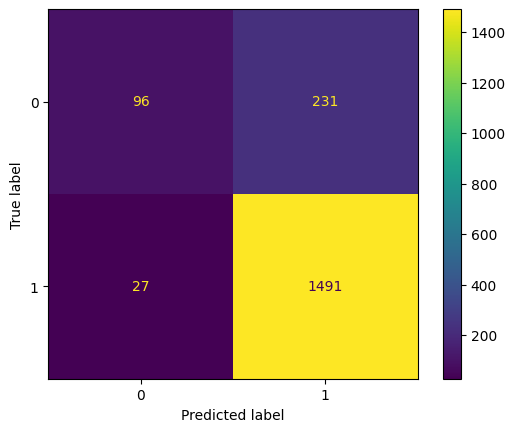

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_forest, labels = forest_model.classes_ )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest_model.classes_)
disp.plot()
plt.show()

In [24]:
from sklearn.metrics import precision_score, recall_score


precision = precision_score(y_test, y_pred_forest)
recall = recall_score(y_test, y_pred_forest)
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))


Precision: 0.8658536585365854
Recall: 0.9822134387351779
